# Spam Classification: Data Analysis & Visualization

This notebook performs an exploratory data analysis (EDA) on the Spambase dataset from the UCI Machine Learning Repository. We will load the data, examine its properties, and create visualizations to understand the features that distinguish spam from non-spam emails.

## 1. Data Loading and Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

In [ ]:
# We'll fetch the data directly from the UCI repository URL.
print("Fetching data from UCI repository...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# The dataset doesn't have a header row, so we'll define the column names manually.
col_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'spam'
]

try:
    # Fetch the content from the URL
    response = requests.get(url)
    response.raise_for_status() 
    
    # Use pandas to read the CSV data from the response content
    df = pd.read_csv(io.StringIO(response.text), header=None, names=col_names)
    print("Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")

Fetching data from UCI repository...
Data loaded successfully!
Dataset shape: (4601, 58)


## 2. Initial Data Exploration

In [12]:
print("--- First 5 rows of the dataset ---")
display(df.head())

--- First 5 rows of the dataset ---


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [13]:
print("\n--- Statistical Summary ---")
display(df.describe())


--- Statistical Summary ---


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [14]:
print("\n--- Missing Values Check ---")
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")


--- Missing Values Check ---
Total missing values: 0


## 3. Data Visualization

In [15]:
# Set the style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

### Class Distribution (Spam vs. Not Spam)

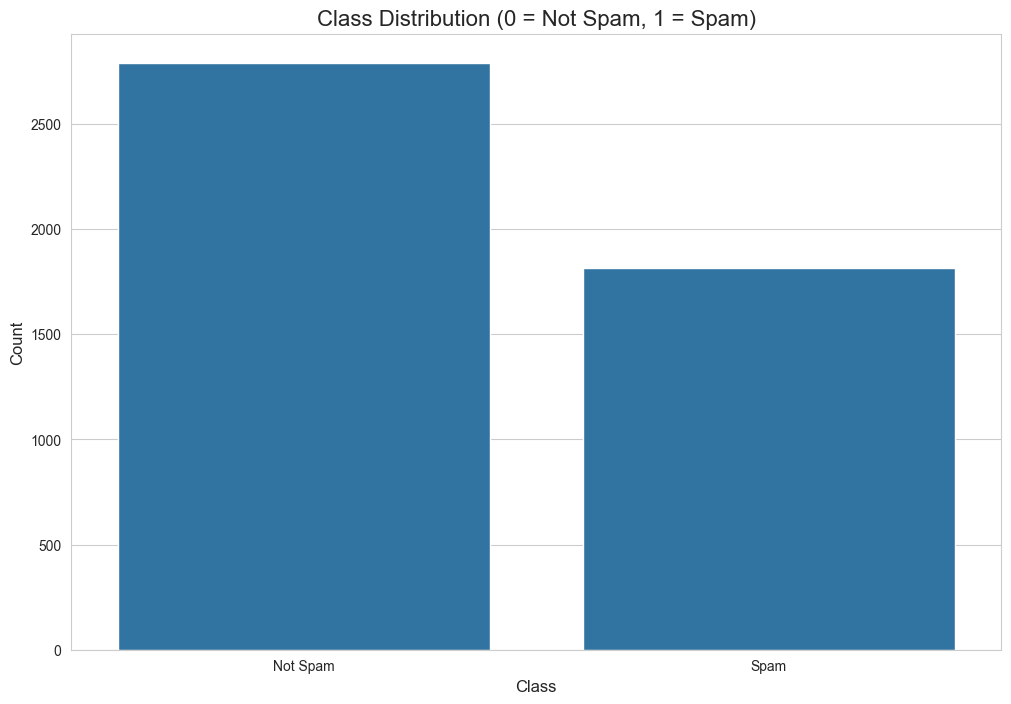

In [16]:
plt.figure()
sns.countplot(x='spam', data=df)
plt.title('Class Distribution (0 = Not Spam, 1 = Spam)', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()

**Conclusion:** The dataset contains more non-spam emails (class 0) than spam emails (class 1). Specifically, there are approximately 2800 non-spam and 1800 spam emails. This indicates a moderate class imbalance, which is important to keep in mind during model training and evaluation.

###  Correlation Heatmap of Features for Spam
This helps to see which features are correlated with the 'spam' label. We will look at the top 20 most positively correlated features.

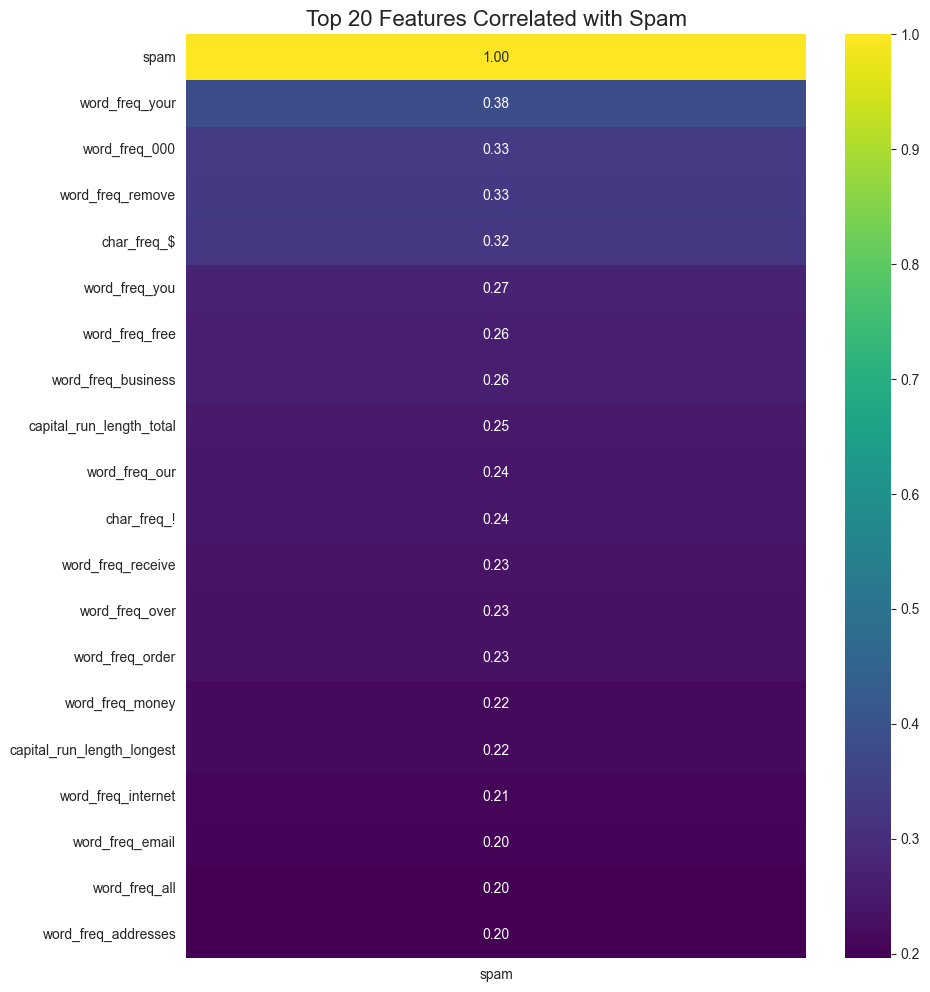

In [17]:
plt.figure(figsize=(10, 12))
spam_corr = df.corr()[['spam']].sort_values(by='spam', ascending=False)
sns.heatmap(spam_corr.head(20), annot=True, cmap='viridis', fmt=".2f")
plt.title('Top 20 Features Correlated with Spam', fontsize=16)
plt.show()

**Conclusion:** The heatmap clearly shows that certain words and characters are highly correlated with spam. The frequencies of `your`, `free`, `remove`, and the characters `!` and `$` are the strongest indicators. This confirms that content-based features are very powerful for this classification task.

### Distribution of Key Features for Spam vs. Not Spam
Let's create boxplots for some of the features that the heatmap showed were highly correlated with spam.

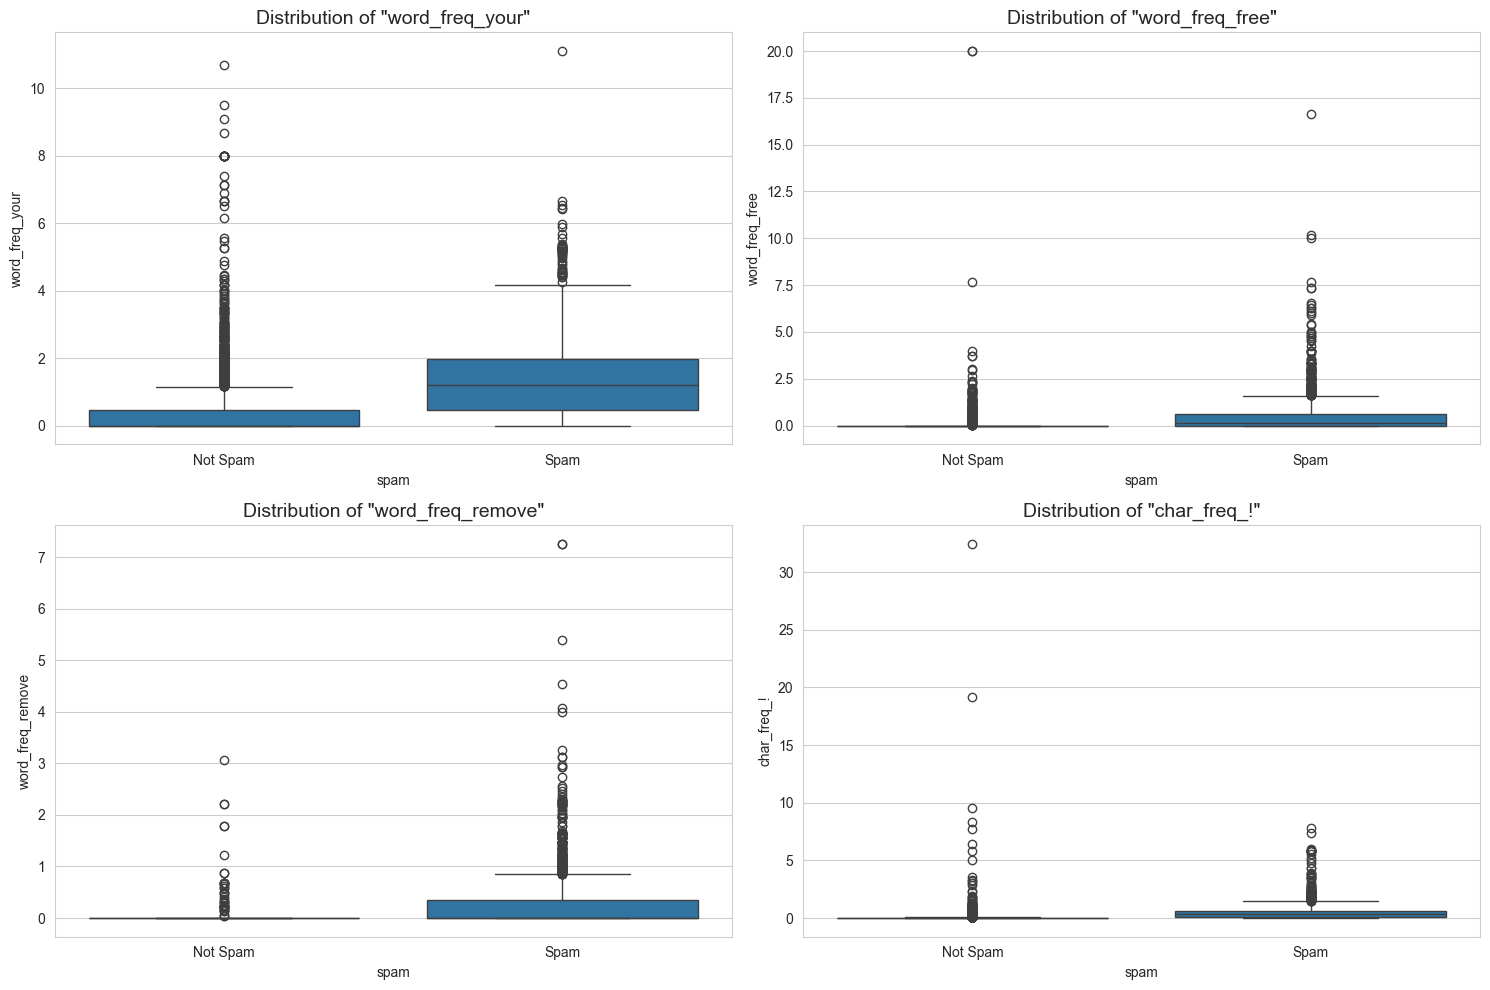

In [18]:
key_features = ['word_freq_your', 'word_freq_free', 'word_freq_remove', 'char_freq_!']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='spam', y=feature, data=df)
    plt.title(f'Distribution of "{feature}"', fontsize=14)
    plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.tight_layout()
plt.show()

**Conclusion:** The boxplots reinforce the findings from the correlation heatmap. For each of these key features, the median frequency (the line inside the box) is significantly higher for spam emails. Spam emails also show a much wider range of values and more outliers with high frequencies for these terms, while non-spam emails typically have frequencies at or near zero.

###  Visualize Capital Letter Features
The length of consecutive capital letters can be a strong indicator of spam. We'll visualize these features on a log scale to better handle their skewed distributions.

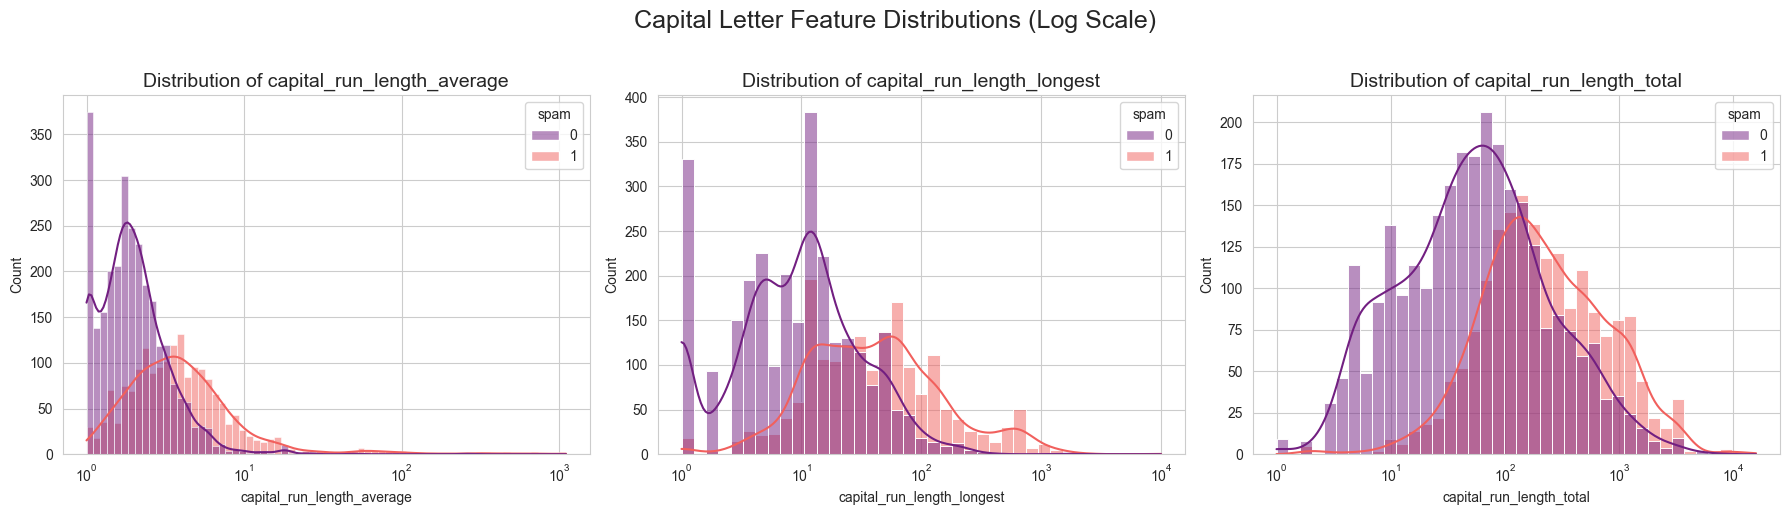

In [19]:
capital_features = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(capital_features, 1):
    plt.subplot(1, 3, i)
    # Using a log scale can help visualize skewed data more clearly
    sns.histplot(data=df, x=feature, hue='spam', kde=True, log_scale=True, palette='magma')
    plt.title(f'Distribution of {feature}', fontsize=14)
plt.suptitle('Capital Letter Feature Distributions (Log Scale)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

**Conclusion:** These histograms show a clear separation between spam and non-spam emails based on the use of capital letters. Spam emails (orange distribution) consistently have a higher average run length, a longer maximum run length, and a much higher total number of capital letters. This is a classic characteristic of spam, which often uses excessive capitalization for emphasis.

The visualizations confirm that several features related to word/character frequencies and capital letters are strong predictors for classifying spam.
Hence, we can keep in mind about above factors while training and testing our model